In [1]:
%pip install -q numpy matplotlib opencv-python ipympl plotly

# import of the libraries
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import cv2 as cv
import time


Note: you may need to restart the kernel to use updated packages.


# Non linear filtering, mathematical morphology, segmentation

We are going to follow a complete image processing that achieves of non linear filtering and different mathematical morphology operations (sort, segmentation and labelling). 

## Preprocessing

### Denoising

The goal is to compare the performance of linear versus non-linear filters, 
for the denoising of an image.

Write the python code in order to:
* read the _tapis.png_ noisy image
* filter it spatially by using a mean filter with kernel $(3 \times 3)$  
* filter it spatially by using a median filter with kernel $(3 \times 3)$ with _cv.medianBlur()_
* display the 175th rows of the 3 images  


image size = (480, 480, 3)
image size = (480, 480)
pixel type = uint8


<StemContainer object of 3 artists>

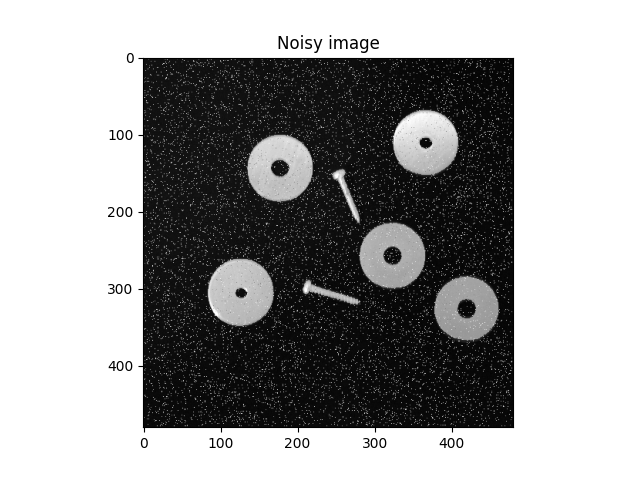

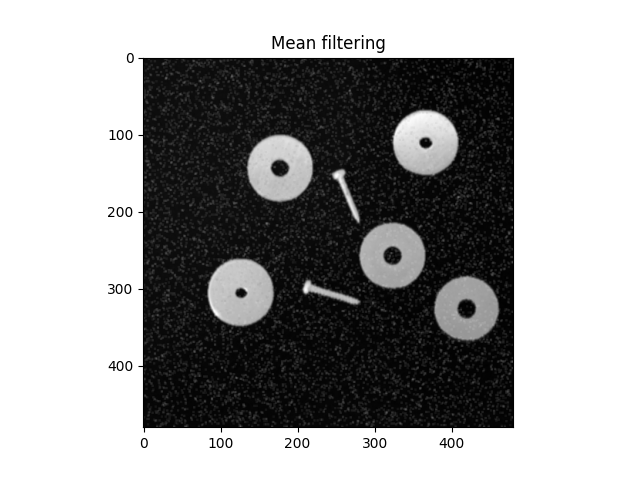

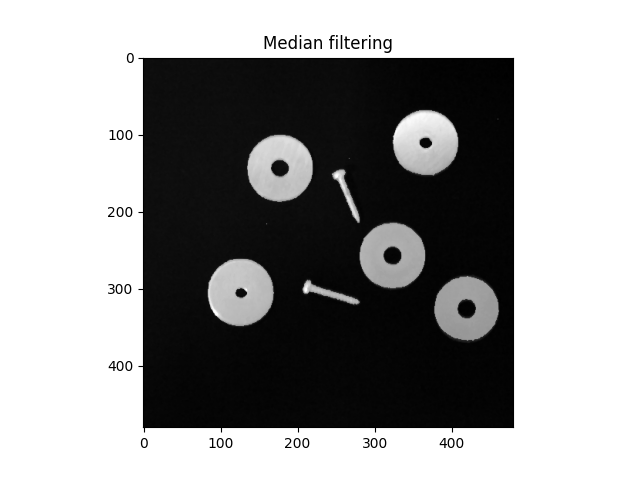

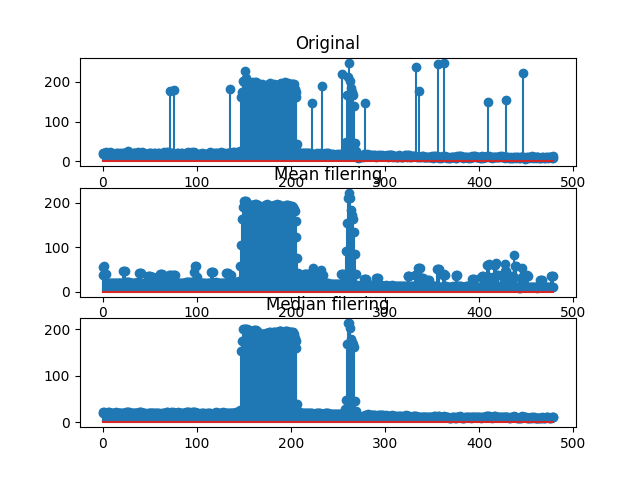

In [4]:
# image reading
im = cv.imread('../standard_test_images/tapis.png')
print ('image size =', np.shape(im)) 

im = im[:,:,1] # lus comme une image couleur ? 
print ('image size =', np.shape(im)) 
print ('pixel type =', im.dtype)

# image display


# Filtering by using a mean filter (3x3) 

## kernel
kernel1 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

## filtering 


# image display


# Filtering by using a median filter (3x3) 


# image display


# Diplay of the 175th rows 




**Questions:**
   
* What are the characteristics of this "salt-and-pepper" noise? 
* Why the median filter is more efficient in this case? How does it work?

**Responses:**
   
   

### Binarization 

By using the Otsu's method, determine the threshold in order to binarize the image filtered. 

Check that the resul is correct such as background's pixels are equal to 0, form's pixels are equal to 1. 

Note that OpenCV will use images in uint8 format (and not boolean) in the following steps. 


Automatic threshold:  49.0


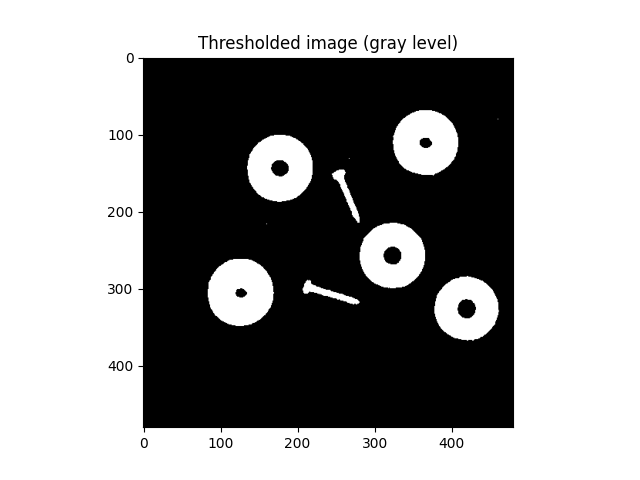

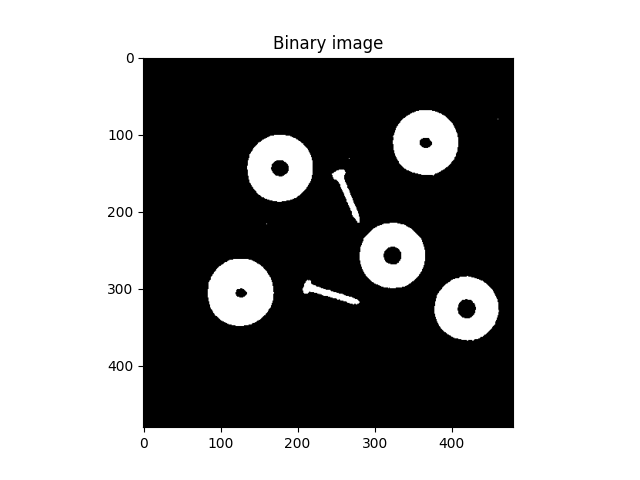

In [5]:
# "Binarization" with an automatic threshold (by Otsu method)





## Mathematical morphology operations on binary images

### Removing of the screws

To remove the screws from the "binary image", proceed in 2 steps:
- first, one single erosion removes all the screw (but also the rings), 
- then by controlled successive dilations, the rings are reshaped.

Write the python code in order to:
* create a circular structural element with a large radius with _cv.getStructuringElement()_
* erode the "binary" image in order to remove the screws, with _cv.erode()_
* by successive dilations (using small circular structural element), reshape de rings, with _cv.dilate()_


Number of dilations: 4


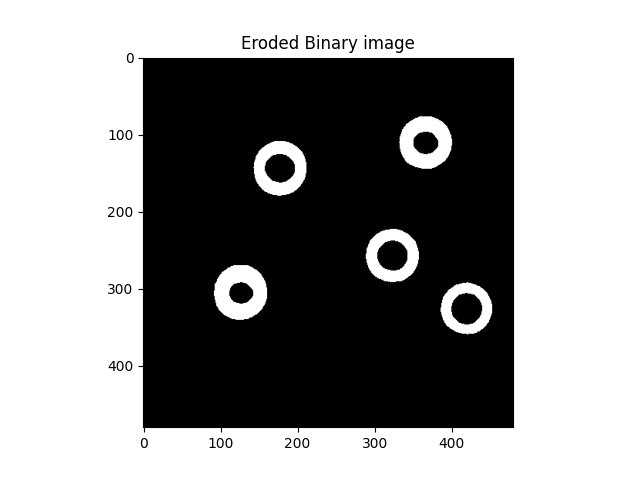

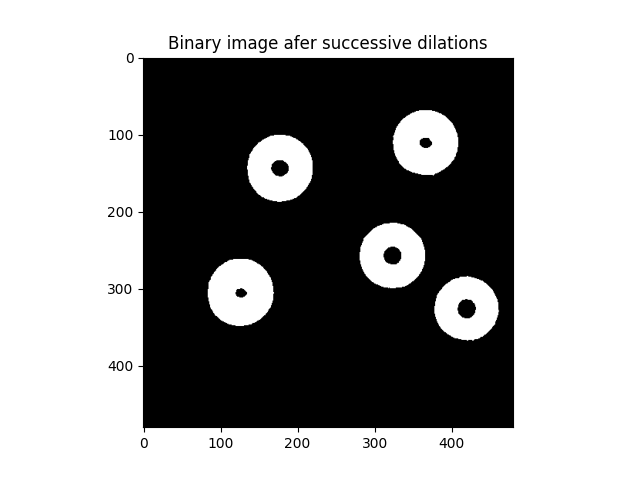

In [6]:
# RAZ (figures closing)
plt.close('all')

# Removing of the screws 

# circular structural element 

# Erosion 


# Successives Dilations 

# initialisation
count = 0;
# Structural element B2
im_tmp = cv.convertScaleAbs( np.zeros( np.shape(imbw_T) ) );

# Iterations up to idempotence
while( (cv.subtract(imbw_T, im_tmp).any()) ):
    count = count+1;
    im_tmp = imbw_T; # before dilation
    
    
# display 

    

**Questions:**
   
* How do you choose the structural element used for the erosion?   
* How do you choose the structural element used for the successive dilations? 
* What is the criteria used to stop the successive dilations? 

**Responses:**



### Segmentation and labelling of the objects

We are going to use the Rosenfeld algorithm in order to segment and count the objects in the binary image.
Complete the fonction below and test it:
- first on a small matrix (define just after)
- next, on the complete binary image.


In [17]:
def label(I_in):
    
    """
    Labelling of an binary image by using the Rosenfeld method. 
    Usage: 
    nb_objects, I_out = label(I_in)
    - I_in: input binary image 
    - nb_objects: number of connected objects obtained after segmentation
    - I_out: segmented output image  
    """
    
    # initialisation 
    
    nb_rows, nb_colums = np.shape(I_in); 
    
    # The table "labels" contains the pixels of the form.
    # The pixels are ranked as by a raster-scan of the image (i.e. from top-down, left-right). 
    # The table has 3 columns :
    # - 1st column: row index of the pixels
    # - 2nd colum: columns index
    # - label of the pixel
    
    # find the coordinates of the pixels equal to 1
    coords = cv.findNonZero(I_in) 
        # coordinates of the pixels equal to 1
        # Note: the indexes rows/columns returned here are inversed (column index first)
    nb_pixels_1 = np.shape(coords)[0] # nb of pixels equals to 1 (that belong to the form)
    
    # labels filling with the form's pixels coordinates
    labels = np.zeros([nb_pixels_1, 3]).astype(int) # creations
    coords_flatten = coords.flatten()  # all the coordinates in one column (1D)
    labels[0:, 0] = coords_flatten[1::2] # row indexes of the form pixelss
    labels[0:, 1] = coords_flatten[0::2] # column indexes of the form pixels
    
    # labels filling: computation of the form's pixels labels
    
    # initialisation of the labels 
    labels[0:, 2] = -1 # labels initialisation: "-1" = no label 
    labels[0, 2] = 1 # for the first pixel => label = 1 (note: the background label is 0)
    
    # then scan of the other pixels in labels:

    for m in range(1, nb_pixels_1): # m: index of the current pixel
                
        # coordinates of the current pixels
        coord_Cr = labels[m, 0]; # rows index 
        coord_Cc = labels[m, 1]; # columns index
        
        # coordinates of its left neighbour
        
            #TO COMPLETE
            
        # coordinates of its top neighbour
        
             #TO COMPLETE
        
        # research of an (eventual) left neighbour 
        # between the previous pixels in "labels"
        
        index_neighbour_L = -1; # initialisation : no left neighbour in labels
        
        eventual_neigbours_Lr = np.where( labels[0:m, 0]==coord_Lr )[0] # possibility in labels
        nb_eventual_neigbours_Lr = np.size( eventual_neigbours_Lr )
        
        if (nb_eventual_neigbours_Lr > 0):              
            eventual_neigbour_Lc = np.where( labels[ eventual_neigbours_Lr, 1]==coord_Lc )[0];
            nb_eventual_neigbours_Lc = np.size( eventual_neigbour_Lc )
            
            if (nb_eventual_neigbours_Lc > 0): 
                index_neighbour_L = eventual_neigbours_Lr[ eventual_neigbour_Lc[0] ]
                
        # research of an (eventual) top neighbour 
        # between the previous pixels in "labels"
        
             #TO COMPLETE
               
        # labeling according to the neigbours 
        
        # if the current pixel has a Left neighbour AND a top neighbour 
        if (( index_neighbour_L != -1) and ( index_neighbour_T != -1)):
            label_min = np.min( [ labels[index_neighbour_L][2], labels[index_neighbour_T][2] ] );
            label_max = np.max( [ labels[index_neighbour_L][2], labels[index_neighbour_T][2] ] );
             #TO COMPLETE # label for  the current pixel
            
            # if the 2 labels are different for the connected pixels => previous labels actualisation
            if (label_min != label_max):  
                for j in range(1,m): # pixels connected with the current one => label_min
                    if ( labels[j][2] == label_max):
                         #TO COMPLETE
                    if ( labels[j][2] > label_max): # pixels not connected with the current one and with a higher label
                         #TO COMPLETE # these labels have to be decremented
                    
        
        # if the current pixel has only a Left neighbour
        elif (index_neighbour_L != -1):
             #TO COMPLETE # current pixel label = label of its left neighbour
 
        # if the current pixel has only a top neighbour 
        elif (index_neighbour_T != -1):  
              #TO COMPLETE # current pixel label = label of its top neighbour
        
        # if the current pixel has no neighbour
        else:
            label_max = -1;
            for j in range(1,m): # find the max label among the previous
                if( labels[j][2] > label_max): 
                    label_max = labels[j][2];
             #TO COMPLETE # new label by incrementation of the max label 
                   
    # objects number and segmented image
    
    # initialisations
    nb_objects = 0;
    I_out = ( np.zeros([nb_rows, nb_colums])).astype(int); # segmented image (output)
    
    # scan of labels 
    for m in range(0, nb_pixels_1):
        
        xx = labels[m][0]; # pixel row index
        yy = labels[m][1]; # pixel column index
        #TO COMPLETE # pixel label
        
        if( labels[m][2] > nb_objects): 
             #TO COMPLETE 
                    
    return nb_objects, I_out #I_out, nb_obj  
          

AA = 
[[1 1 0 0 0 0]
 [0 0 1 0 1 0]
 [0 1 0 1 1 0]
 [0 0 0 0 0 0]]
nb_obj=  4


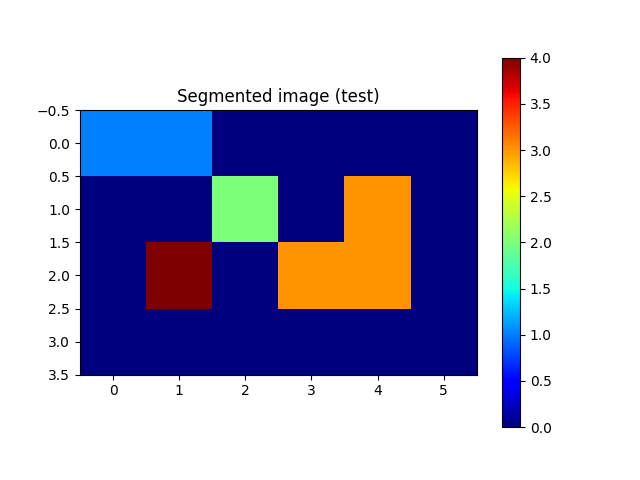

In [29]:
# tests on a small binary image 

# synthesis of the binary image AA
AA = (np.zeros([4, 6])).astype(int);
AA[0,0]=1
AA[0,1]=1
AA[1,2]=1
AA[2,1]=1
AA[1,4]=1
AA[2,4]=1
AA[2,3]=1

print("AA = ")
print(AA)

# segmentation and labelling of AA (and objects counting)
nb_obj, I_seg = label(AA)

# results display
print("nb_obj= ", nb_obj)

plt.figure()
plt.title('Segmented image (test)')
plt.imshow(I_seg, cmap='jet')
plt.colorbar()


nb_obj=  5


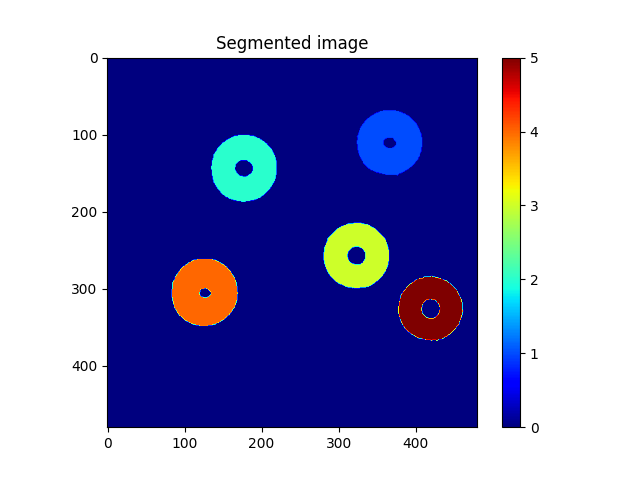

In [31]:
# RAZ (figures closing)
plt.close('all')

# segmentation and labelling of the binary image with the rings (and counting of the laters)

    #TO COMPLETE
    
# display 
    #TO COMPLETE

**Questions:**

We consider the _labels_ matrix define in the _label()_ function, 
and _m_ is the processed current pixel:
- How do you get the coordinates of the left neighbour of m?
- How do you get the coordinates of the top neighbour of m?
- Is it an issue if the computed coordinates of the neighbour of _m_ is outside the image border?  
- What is the label of _m_ if it has 2 neighbours (left and top) with the same label? 
- What is the label of _m_ if it has 2 neighbours (left and top) with different labels? What operation is then necessary for the pixels not connected with _m_ and such as their label is higher than _m_'s label?
- What is the label of _m_ if it has only one left neighbour?
- What is the label of _m_ if it has only one top neighbour?
- What is the label of _m_ if it has no neighbour?
- Why does the Rosenfeld's method compute also the number of connected objects? What is the requirement for the background's label?

**Responses:**



## Morphological mathematic operations on gray image 

Write the code in order to: 
- load the _cameraman.png_ image
- erode, dilate, open or close the original by using a circular structural element
- display side-by-side the eroded / opened images
- display side-by-side the dilated / closed images

image size = (256, 256)
pixel type = float32


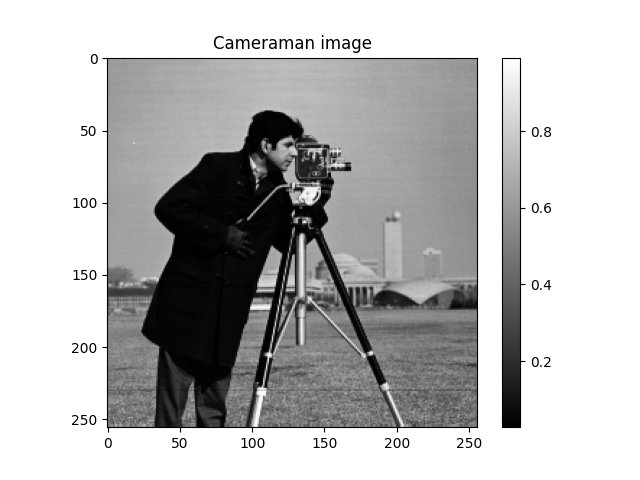

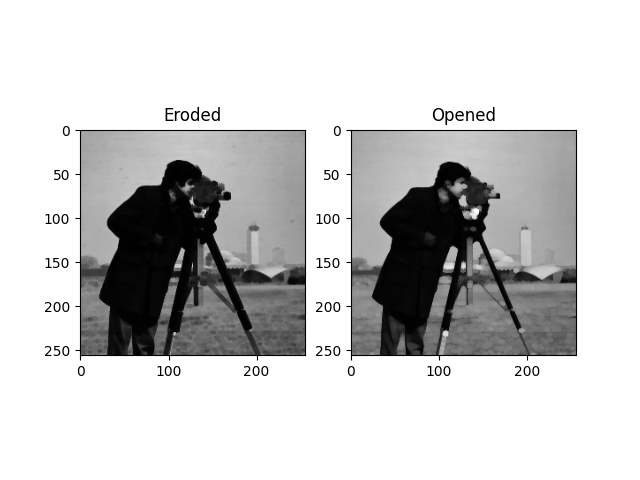

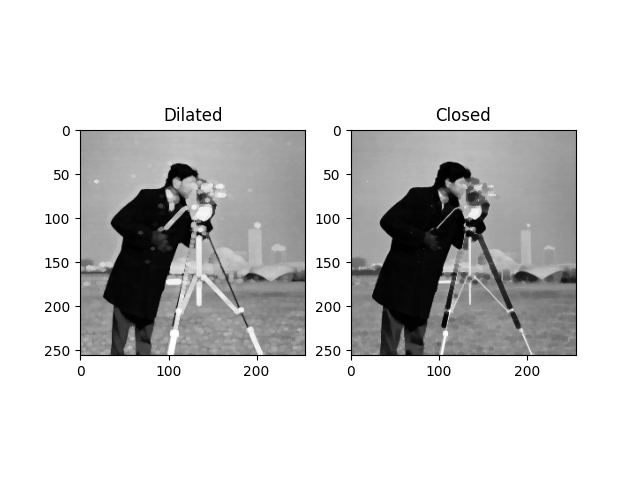

In [43]:
# RAZ (figures closing)
plt.close('all')

# loading
im = plt.imread('../standard_test_images/cameraman.png')

# image size and pixel type 
print ('image size =', np.shape(im)) 
print ('pixel type =', im.dtype)

# display
plt.figure()
plt.title('Cameraman image')
plt.imshow(im, cmap='gray')
plt.colorbar()

# circular structural element


# erosion 


# opening 


# display 


# dilation 


# closing


# display 



**Questions:**
- What are the mathematical definitions of these morphological operations (when used on gray images)?
- Explain the effects on the images? 

**Responses:**
